In [97]:
# All imports here

import plotly.plotly as py
import plotly.graph_objs as go
from plotly.tools import FigureFactory as FF

import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [18]:
# Access token for this specific world map

mapbox_access_token = 'pk.eyJ1IjoiZGxyb21hbm9mZiIsImEiOiJjanBteXZycnQwNGFiNDRwYnVqMTMxOWxnIn0.NDZecgSdD6iH8CK0XXdx0g'

In [19]:
# Bringing in and reading csv for 2019 earthquakes

df2019 = pd.read_csv('https://raw.githubusercontent.com/labs13-quake-viewer/ds-data/danielle-romanoff/earthquakes_2019.csv')
df2019 = df2019.drop(['nst', 'gap', 'dmin', 'horizontalError', 'magError', 'magNst'], axis=1)
df2019.shape

(5084, 16)

In [29]:
df2019.head()

,time,latitude,longitude,depth,mag,magType,rms,net,id,updated,place,type,depthError,status,locationSource,magSource
0,2019-05-29T14:54:26.101Z,33.9810,-38.9565,10.00,5.2,mb,0.60,us,us60003tmh,2019-05-29T15:33:30.040Z,Northern Mid-Atlantic Ridge,earthquake,1.8,reviewed,us,us
1,2019-05-29T14:43:40.242Z,33.8577,-38.9584,10.00,5.0,mb,0.48,us,us60003tn2,2019-05-29T15:31:41.040Z,Northern Mid-Atlantic Ridge,earthquake,1.9,reviewed,us,us
2,2019-05-29T14:15:36.823Z,-3.2051,140.3803,35.00,4.5,mb,0.64,us,us60003tlr,2019-05-29T14:55:45.040Z,"67km SSW of Abepura, Indonesia",earthquake,1.9,reviewed,us,us
3,2019-05-29T14:09:13.618Z,43.3353,144.4247,141.68,4.2,mb,0.51,us,us60003tle,2019-05-29T15:52:20.040Z,"40km N of Kushiro, Japan",earthquake,8.1,reviewed,us,us
4,2019-05-29T13:49:15.353Z,15.1410,-92.5801,111.03,4.6,mb,0.81,us,us60003tl3,2019-05-29T15:50:49.040Z,"8km S of Villa Comaltitlan, Mexico",earthquake,5.8,reviewed,us,us


In [20]:
# Making a df with only the columns needed for the map

quake2019 = df2019.copy()
quake2019 = quake2019.drop(['magType', 'rms', 'net', 'id', 'updated', 'type', 'depthError', 'status',
                 'locationSource', 'magSource', 'place'], axis=1)
quake2019.head()

,time,latitude,longitude,depth,mag
0,2019-05-29T14:54:26.101Z,33.9810,-38.9565,10.00,5.2
1,2019-05-29T14:43:40.242Z,33.8577,-38.9584,10.00,5.0
2,2019-05-29T14:15:36.823Z,-3.2051,140.3803,35.00,4.5
3,2019-05-29T14:09:13.618Z,43.3353,144.4247,141.68,4.2
4,2019-05-29T13:49:15.353Z,15.1410,-92.5801,111.03,4.6


In [21]:
# Using regex to pull out only the date of the earthquake

quake2019['time'] = quake2019['time'].str.extract('(\d\d\d\d-\d\d-\d\d)', expand=True)
quake2019.head()

,time,latitude,longitude,depth,mag
0,2019-05-29,33.9810,-38.9565,10.00,5.2
1,2019-05-29,33.8577,-38.9584,10.00,5.0
2,2019-05-29,-3.2051,140.3803,35.00,4.5
3,2019-05-29,43.3353,144.4247,141.68,4.2
4,2019-05-29,15.1410,-92.5801,111.03,4.6


In [22]:
# Information to show when hovering over an earthquake marker
# Longitude and Latitude to place earthquake markers in the correct place

site_lat = quake2019.latitude
site_lon = quake2019.longitude
locations_name = df2019.place

# Earthquake markers to put on the map indicating magnitude and depth by color and size

data = [
    go.Scattermapbox(
        lat=site_lat,
        lon=site_lon,
        mode='markers',
        marker=go.scattermapbox.Marker(
            size=(quake2019.mag.values*5),
            color='rgb(255, 0, 0)',
            opacity=0.7
        ),
        text=locations_name,
        hoverinfo='text'
    ),
    go.Scattermapbox(
        lat=site_lat,
        lon=site_lon,
        mode='markers',
        marker=go.scattermapbox.Marker(
            size=abs((quake2019.depth.values/4)),
            color='rgb(242, 177, 172)',
            opacity=0.7
        ),
        hoverinfo='none'
    )]

# Actual World may to display

layout = go.Layout(
    title='Earthquakes 2019',
    autosize=True,
    hovermode='closest',
    showlegend=False,
    mapbox=go.layout.Mapbox(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=go.layout.mapbox.Center(
            lat=38,
            lon=-94
        ),
        pitch=0,
        zoom=3,
        style='light'
    ),
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='Earthquakes 2019')

In [23]:
# Mean magnitude of the earthquakes in 2019

quake2019.mag.mean()

4.562755704169946

Text(0.5, 0.98, 'Earthquakes Pairwise Plots')

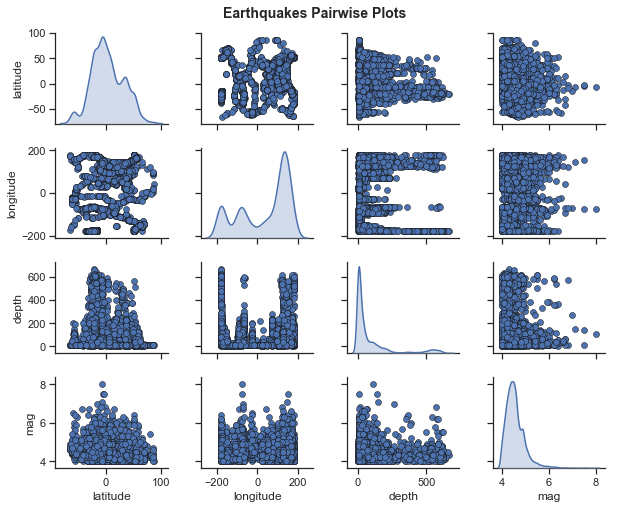

In [121]:
sns.set(style = "ticks", color_codes = True)
pp = sns.pairplot(quake2019, 
                  size=1.8, aspect=1.2,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kws=dict(shade=True), # "diag" adjusts/tunes the diagonal plots
                  diag_kind="kde") # use "kde" for diagonal plots

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
fig.suptitle('Earthquakes Pair Plots', 
              fontsize=14, fontweight='bold')

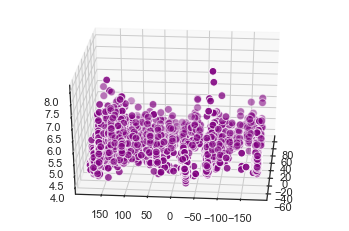

In [123]:
# plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(quake2019['latitude'], quake2019['longitude'], quake2019['mag'], c='purple',
           edgecolors='w', s=60)
ax.view_init(30, 185)
plt.show()

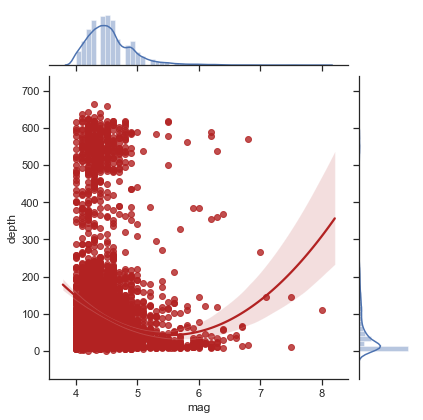

In [126]:
g = sns.JointGrid(x="mag", y="depth", data=quake2019) 
g.plot_joint(sns.regplot, order=2, color='firebrick') 
g.plot_marginals(sns.distplot)

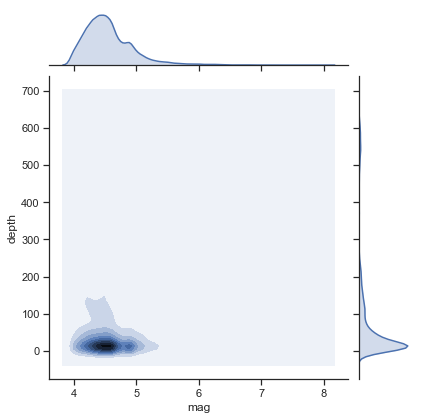

In [103]:
sns.jointplot("mag", "", data=quake2019, kind='kde')